<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Gonzales, Kim Carlo M.<br>
    201911014 <br>
   58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

$\;\;\;\;\;\;$Using the given datasets, create two different functions that would compute for the monthly sales and the flavor sales of Bebang's business for the past year, and visualize it using the matplotlib library. The deliverables are to compute and visualize the sales and costs for the past year of Bebang's business.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [18]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)

## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [19]:
## Let's check the sales dataframe
df_sales


,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [20]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat= np.array(df_prices)[0].reshape((12,1)) ##  reshaped to vector shape of (12,1)
costs_mat = np.array(df_prices)[1].reshape((12,1)) ## reshaped to vector shape of (12,1)

## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)


(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [21]:
##### Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sum(sales_mat * prices_mat) #Compute for the monthly revenue
    monthly_costs = sum(sales_mat * costs_mat) # Compute for the monthly cost
    monthly_profits = monthly_revenue - monthly_costs # Compute for monthly profit
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [22]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values
print('Monthly Revenue: \n',month_rev,'\nMonthly Cost: \n',month_cost,'\nMonthly Profit: \n',month_profit)

Monthly Revenue: 
 [236825 175530 159045  30335 150085  16735  17970  16995  14960  21590
 213655 347365] 
Monthly Cost: 
 [157454 116322 105195  20334  97261  11208  12372  11497   9926  14377
 137107 230209] 
Monthly Profit: 
 [ 79371  59208  53850  10001  52824   5527   5598   5498   5034   7213
  76548 117156]


## Part 2: Flavor Sales

In [23]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    
    flavor_revenue = sum(sales.sum(axis = 1) * price.T) # Compute for the revenue of each flavor
    flavor_costs =  sum(sales.sum(axis = 1)* cost.T) # Compute for the Cost of each flavor
    flavor_profits = flavor_revenue - flavor_costs # Computes for the total profit of each flavor
    return flavor_profits.flatten()



In [24]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
print('Yearly profit per flavor:\n',flavor_profit)

Yearly profit per flavor:
 [41370 19040 53260 23715 61245 18387 30660 39820 44790 27615 26156 91770]


In [25]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
flavors = df_sales['flavor'] # Assigning the variable for the flavors
Yearly_Sales= df_sales.sum(axis = 1) # Sums all of the sales in a year for each flavor
Yearly_Sales.name = 'Sales' # Assigns a name to the summation

# Sorts the ranking of the flavor from highest to lowest by its Sales
Flavor_ranking = flavors.to_frame().join(Yearly_Sales).sort_values(by=['Sales'], ascending = False)

best_3_flavors = Flavor_ranking['flavor'].head(3).tolist() # Gets the top 3 flavors and make them a list
worst_3_flavors = Flavor_ranking['flavor'].tail(3).tolist() # Gets the worst 3 flavors and make them a list

# Printing of the flavors
print('The top 3 selling flavors are:\n',best_3_flavors[0:3],'\n') 
print('The worst 3 selling flavors are:\n',worst_3_flavors[0:3],'\n')

The top 3 selling flavors are:
 ['choco butter naught', 'sugar glazed', 'red velvet'] 

The worst 3 selling flavors are:
 ['oreo', 'chocolate and orange', 'almond honey'] 



## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [26]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

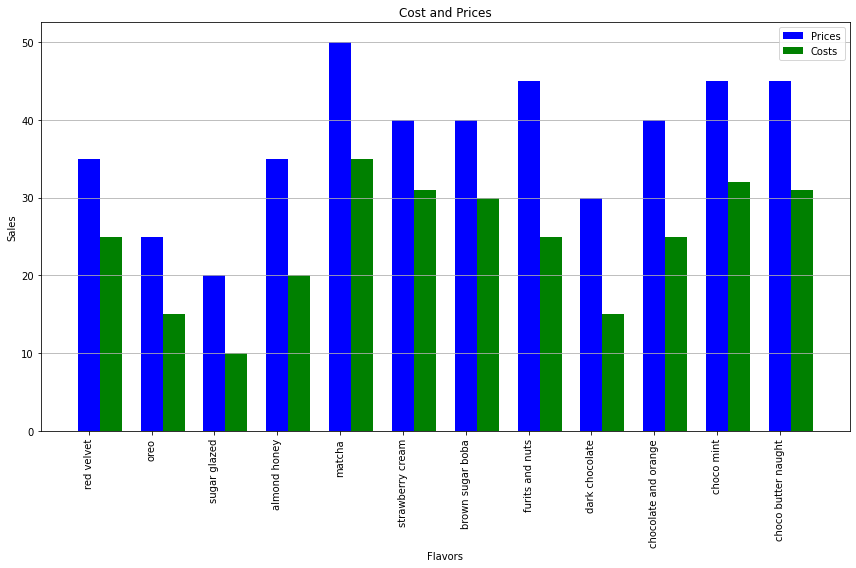

In [29]:
# Assigning of variables
# A list of months
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
Flavor_Prices = df_prices.T['price per piece'].tolist()
Flavor_Costs = df_prices.T['cost per piece'].tolist()
flavors = df_sales['flavor'].tolist()

 # configuration of the graph
fig, ax = plt.subplots(figsize = (12, 8))
flavor = np.arange(len(flavors))
bar_width = 0.35
plt.grid(axis = 'y')

# configuration for price
month1 = plt.bar(flavor, Flavor_Prices, bar_width,
color = 'b',      
label = 'Prices')

# configuration for cost
month2 = plt.bar(flavor + bar_width, Flavor_Costs, bar_width,
color = 'g',
label = 'Costs')

#Labeling
plt.xlabel('Flavors')
plt.ylabel('Sales')
plt.title('Cost and Prices')

# angle of the elements in x axis
plt.xticks(flavor, flavors, rotation = 90)
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# creates a list named flavors which contains the flavor in the series.
flavors = df_sales['flavor'].tolist()

## Function that graph the sales of 2 months
def graph_two_months(x_elem, y_elem1, y_elem2, mnth1 ,mnth2):
    
    # configuration of the graph
    fig, ax = plt.subplots(figsize = (12, 8))
    flavor = np.arange(len(x_elem))
    bar_width = 0.35
    plt.grid(axis = 'y')
    
    # configuration for month 1
    month1 = plt.bar(flavor, y_elem1, bar_width,
    color = 'b',      
    label = Months[mnth1-1])
    
    # configuration for month 2
    month2 = plt.bar(flavor + bar_width, y_elem2, bar_width,
    color = 'g',
    label = Months[mnth2-1])

    #Labeling
    plt.xlabel('Flavors')
    plt.ylabel('Sales')
    plt.title(f'{Months[mnth1-1]} - {Months[mnth2-1]}')
    
    # angle of the elements in x axis
    plt.xticks(flavor, x_elem, rotation = 90)
    plt.legend()

    plt.tight_layout()
    plt.show()

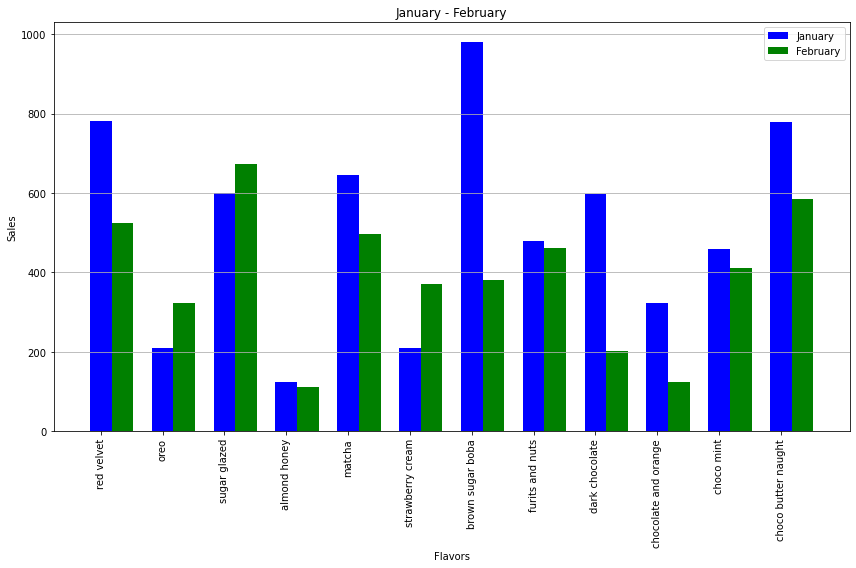

In [31]:
# convertion of series of sales into a list for January and february
mont1 = df_sales['january'].tolist()
mont2 = df_sales['february'].tolist()

graph_two_months(flavors, mont1, mont2, 1, 2)

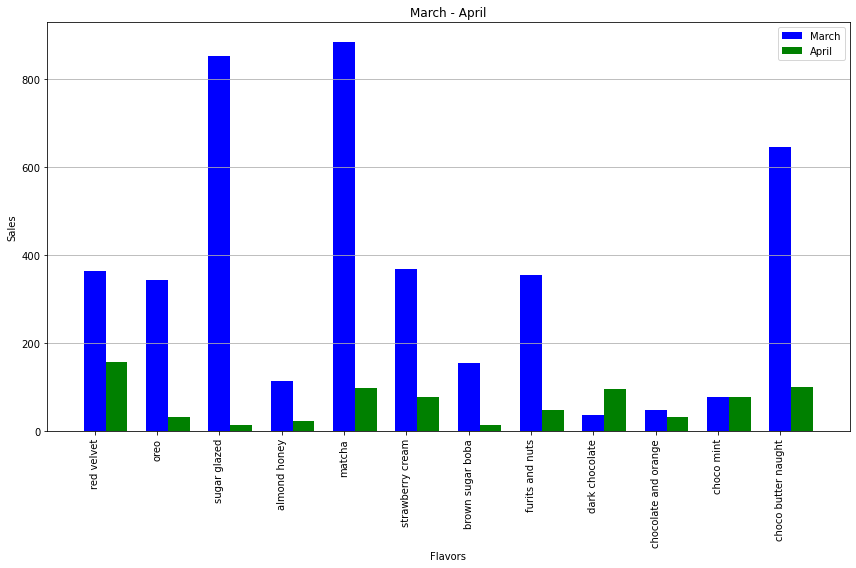

In [32]:
# convertion of series of sales into a list for March and April
mont3 = df_sales['march'].tolist()
mont4 = df_sales['april'].tolist()

graph_two_months(flavors, mont3, mont4, 3, 4)

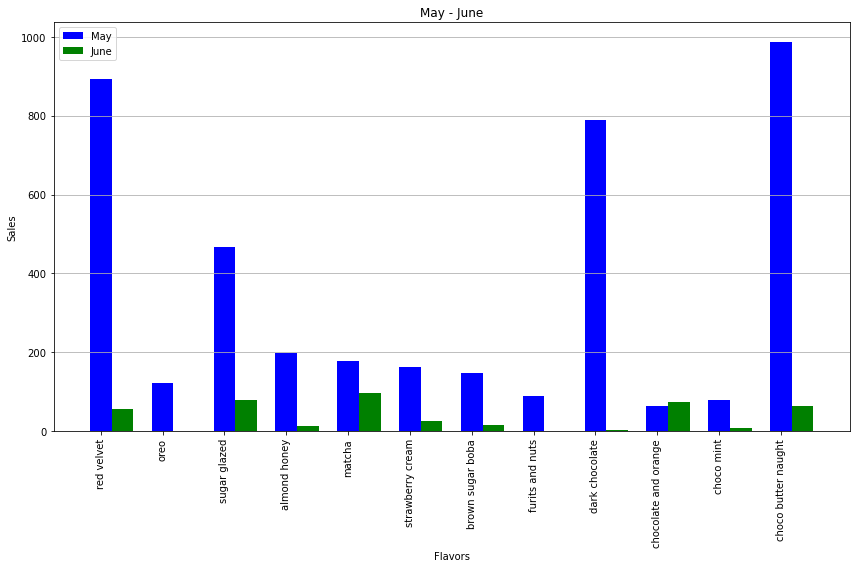

In [33]:
# convertion of series of sales into a list for May and June
mont5 = df_sales['may'].tolist()
mont6 = df_sales['june'].tolist()

graph_two_months(flavors, mont5, mont6, 5, 6)

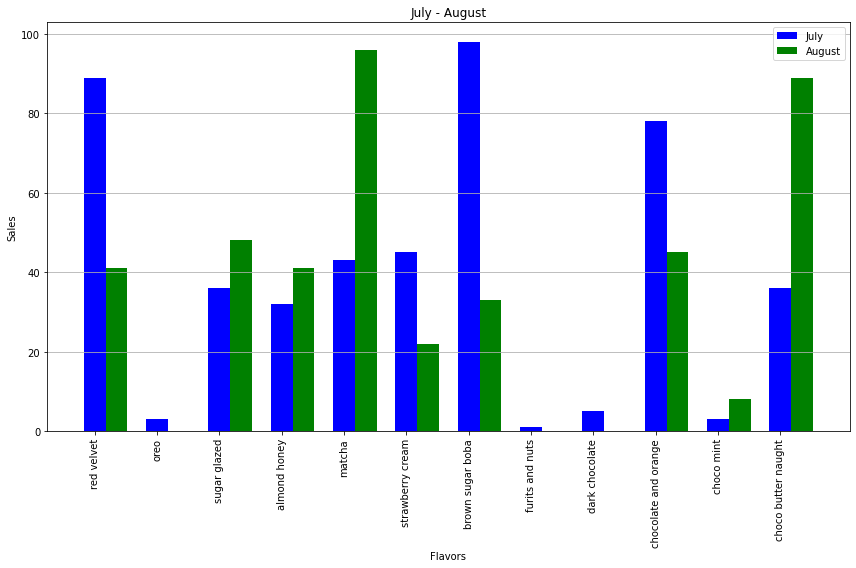

In [34]:
# convertion of series of sales into a list for July and August
mont7 = df_sales['july'].tolist()
mont8 = df_sales['august'].tolist()

graph_two_months(flavors, mont7, mont8, 7, 8)

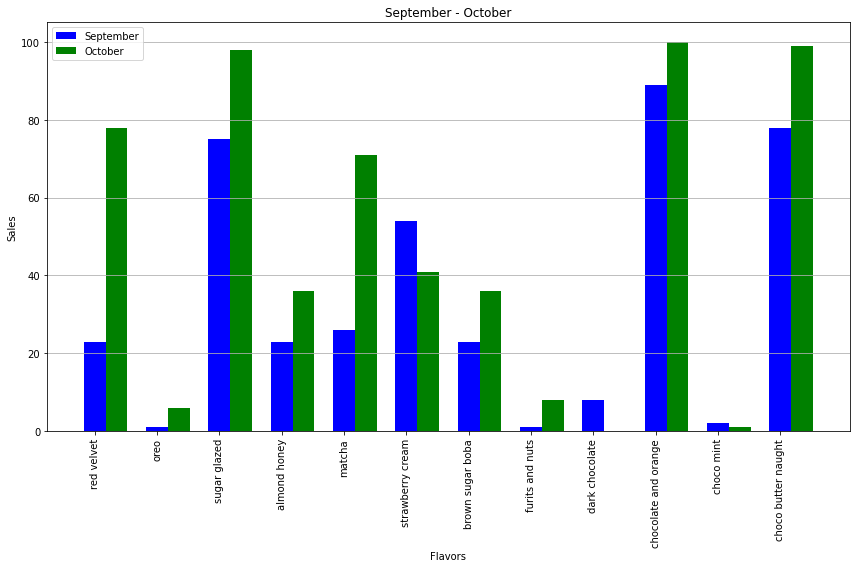

In [35]:
# convertion of series of sales into a list for September and Octeber
mont9 = df_sales['september'].tolist()
mont10 = df_sales['october'].tolist()

graph_two_months(flavors, mont9, mont10, 9, 10)

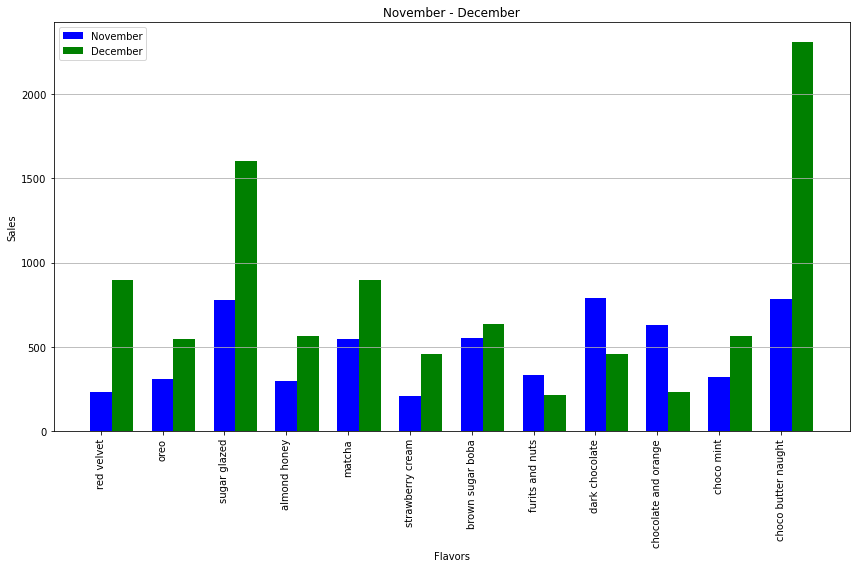

In [36]:
# convertion of series of sales into a list for November and December
mont11 = df_sales['november'].tolist()
mont12 = df_sales['december'].tolist()

graph_two_months(flavors, mont11, mont12, 11, 12)

#### Monthly Sales

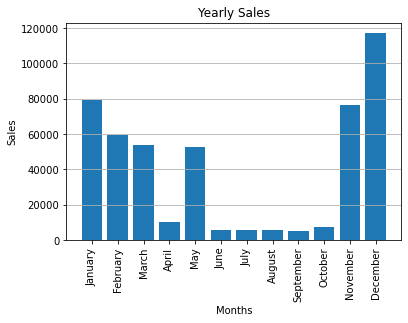

In [37]:

# assigning of variables
months = np.arange(len(Months))
sales = month_profit

# Creation of graph
plt.grid(axis = 'y')

plt.bar(months, sales, alpha=1) # creates the bar graph
plt.xticks(months, Months, rotation = 90) # Assigning of elements in the x axis of the graph

# Labeling
plt.ylabel('Sales')
plt.xlabel('Months')
plt.title('Yearly Sales')


plt.show()

#### Flavor Sales

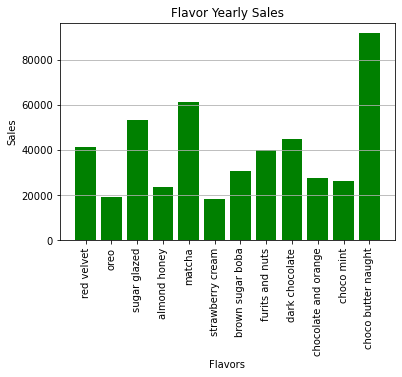

In [38]:
# Assigning of variables
flavors = df_sales['flavor'].tolist()
Flavors = np.arange(len(flavors))

# Creation of graph
plt.grid(axis = 'y') # makes horizontal grid lines

plt.bar(Flavors, flavor_profit, alpha=1, color = 'green') # Create the bar graph
plt.xticks(Flavors, flavors, rotation = 90) # # Assigning of elements in the x axis of the graph

# Labeling
plt.ylabel('Sales')
plt.xlabel('Flavors')
plt.title('Flavor Yearly Sales')

plt.show()

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

#### Findings
$\;\;\;\;\;\;$ The data shown in the first graph are the cost and price of each flavor in the store of Bebang. As seen in the graph, the highest in terms of price and cost is the flavor matcha, while sugar-glazed is the lowest. The next six graphs are the detailed sales for each month over the year. The 8th graph would be about the Yearly Sales, which is the summary of the sales of each month.  The most profitable month is December, while the least profitable month is September. The last graph is the summary of sales for each flavor over the year. The final graph shows the sales for each flavor in which the choco butter naught is the most profitable flavor while strawberry cream the least profitable of all the flavors. There is also the ranking of the most bought flavors, and the least bought flavors, in which the top three are choco butter naught, sugar-glazed, and red velvet, while the least bought flavors are oreo, chocolate & orange, and almond honey. <br>
<br>
#### Recommendations
$\;\;\;\;\;\;$ I could recommend that to either get some advertisements when it is the month of June to October or decrease the production or stock when it is the end of May to the start of September. They could also create new flavors that would sell well in the months from June to October to try to increase the sales for the month. Another recommendation would be to restock heavily at the end of September and October because there would be a surge of sales in the upcoming months. In terms of restocking, they should prioritize the choco butter naught because it is the flavor that sells the most, and they might have some shortage of it.